In [1]:
import torch
from torch import Tensor
import numpy as np
from typing import Tuple
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import wget
import torchvision
from torchvision import transforms
import numbers
import random
import math
import torch.nn as nn
from PIL import Image, ImageFilter
from skimage import color
import cv2
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter
from torchvision.transforms import functional as F
from scipy.fft import fft, rfft, irfft, ifft,fftshift, fft2, ifft2, dct, idct
from pytorch_wavelets import DWTForward, DWTInverse # (or import DWT, IDWT)

In [2]:
from pytorch_wavelets import DWTForward, DWTInverse 

In [3]:
import sys
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)

Python version
3.8.9 (default, Apr  3 2021, 01:00:00) 
[GCC 7.5.0]
Version info.
sys.version_info(major=3, minor=8, micro=9, releaselevel='final', serial=0)


In [4]:
batch_size_test = 8
test_loader_mnist = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                                 torchvision.transforms.Resize(32),
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,),
                               )
                             ])),
  batch_size=batch_size_test, shuffle=False)

/data/code/spectral-phase-retrieval/.venv/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
img_batch, targets_batch = next(iter(test_loader_mnist))

In [12]:
mnist_img_tensor = img_batch[0][None]
mnist_img_np = img_batch[0,0].numpy()

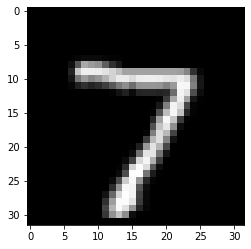

In [7]:
plt.imshow(mnist_img_tensor, cmap='gray', interpolation='none')

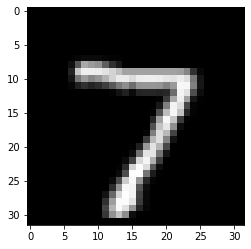

In [8]:
plt.imshow(mnist_img_np, cmap='gray', interpolation='none')

In [33]:
xfm = DWTForward(J=3, mode='reflect', wave='db3')  # Accepts all wave types available to PyWavelets
ifm = DWTInverse(mode='reflect', wave='db3')

In [34]:
Yl, Yh = xfm(mnist_img_tensor)

In [35]:
Yl.shape, len(Yh), [print(hp.shape) for hp in Yh]

torch.Size([1, 1, 3, 18, 18])
torch.Size([1, 1, 3, 11, 11])
torch.Size([1, 1, 3, 8, 8])


(torch.Size([1, 1, 8, 8]), 3, [None, None, None])

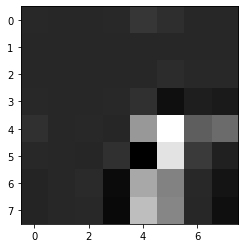

In [36]:
plt.imshow((Yl[0,0]+5.4)/12.0, cmap='gray', interpolation='none')

In [37]:
Yl[0,0].min(), Yl[0,0].max(), Yl[0,0].mean(), Yl[0,0].std()

(tensor(-5.3376), tensor(7.2449), tensor(-2.6274), tensor(2.3978))

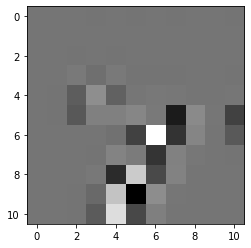

In [41]:
plt.imshow((Yh[1][0,0,1]+5.4)/12.0, cmap='gray', interpolation='none')

In [43]:
img_lena = Image.open("lena.jpg")

In [45]:
img_lena_tensor = transforms.ToTensor()(img_lena)

In [47]:
img_lena_tensor.shape

torch.Size([3, 512, 512])

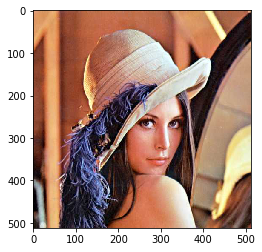

In [48]:
plt.imshow(img_lena_tensor.permute(1,2,0), cmap='gray', interpolation='none')

In [50]:
lena_Yl, lena_Yh = xfm(img_lena_tensor[None])

In [53]:
lena_Yl.shape, lena_Yl.max(), lena_Yl.min()

(torch.Size([1, 3, 68, 68]), tensor(8.8068), tensor(-0.6046))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


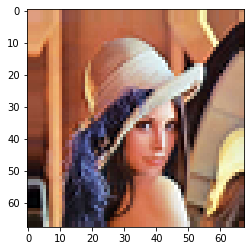

In [56]:
plt.imshow(lena_Yl[0].permute(1,2,0)/2**3, cmap='gray', interpolation='none')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


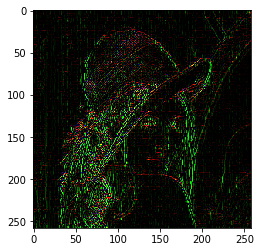

In [65]:
plt.imshow(lena_Yh[0][0,0].permute(1,2,0)*(2**3), cmap='gray', interpolation='none')

In [71]:
lena_Yh[0].shape, lena_Yh[0][0,0].max(), lena_Yh[0][0,0].min(), lena_Yh[0][0,0].mean(), lena_Yh[0][0,0].std()

(torch.Size([1, 3, 3, 258, 258]),
 tensor(0.5006),
 tensor(-0.5420),
 tensor(-0.0002),
 tensor(0.0265))

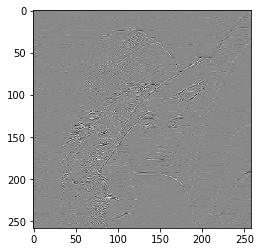

In [73]:
plt.imshow(lena_Yh[0][0,0,0]*2, cmap='gray', interpolation='none')